In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
def plot_result(history, ymin = None, ymax = None):
    plt.figure(figsize = (15, 10))
    plt.subplot(1, 2, 1)

    plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label = 'train loss')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label = 'validation loss')
    plt.title('LOSS', color = 'w')
    
    plt.xticks(color = 'w')
    plt.yticks(color = 'w')
    plt.xlabel('Epochs', color = 'w')
    plt.ylabel('Loss', color = 'w')
    if ymin != None and ymax != None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label = 'train accuracy')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label = 'validation accuracy')
    plt.title('ACCURACY', color = 'w')
    
    plt.xticks(color = 'w')
    plt.yticks(color = 'w')
    plt.xlabel('Epochs', color = 'w')
    plt.ylabel('Accuracy', color = 'w')
    if ymin != None and ymax != None:
        plt.ylim(ymin, ymax)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [4]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

In [5]:
# Data Loading 및 Dataset 생성
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [6]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 28
N_CLASS = 10

In [7]:
# 전처리할 때는 변수명 따로 저장하는 것이 좋음(변경 전/후 비교 가능)
# X값 전처리
X_train = train_image/255
X_test = test_image/255

# 원핫인코딩
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [ ]:
train_label[0]

5

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
# Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder = True)\
                               .repeat()
    
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [9]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

# 모델의 크기 변경

In [ ]:
# 작은 모델 => Layer층, unit 수가 적은 것
def create_model():
    model = keras.Sequential()
    # Input Layer
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    # Hidden Layer
    model.add(keras.layers.Dense(8, activation = 'relu'))
    # Output Layer
    model.add(keras.layers.Dense(N_CLASS, activation = 'softmax'))
    
    # 컴파일
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


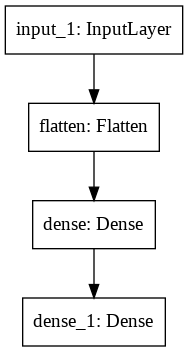

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
# 학습
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps)

Epoch 1/20
600/600 [==============================] - 5s 3ms/step - loss: 1.3855 - accuracy: 0.5793 - val_loss: 0.4234 - val_accuracy: 0.8837
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4011 - accuracy: 0.8877 - val_loss: 0.3323 - val_accuracy: 0.9096
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3259 - accuracy: 0.9069 - val_loss: 0.3055 - val_accuracy: 0.9150
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3025 - accuracy: 0.9154 - val_loss: 0.2922 - val_accuracy: 0.9191
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2817 - accuracy: 0.9201 - val_loss: 0.2804 - val_accuracy: 0.9227
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2820 - accuracy: 0.9208 - val_loss: 0.2761 - val_accuracy: 0.9239
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2704 - accuracy: 0.9244 - val_loss: 0.2732 - val_accuracy: 0.9239
Epoch 

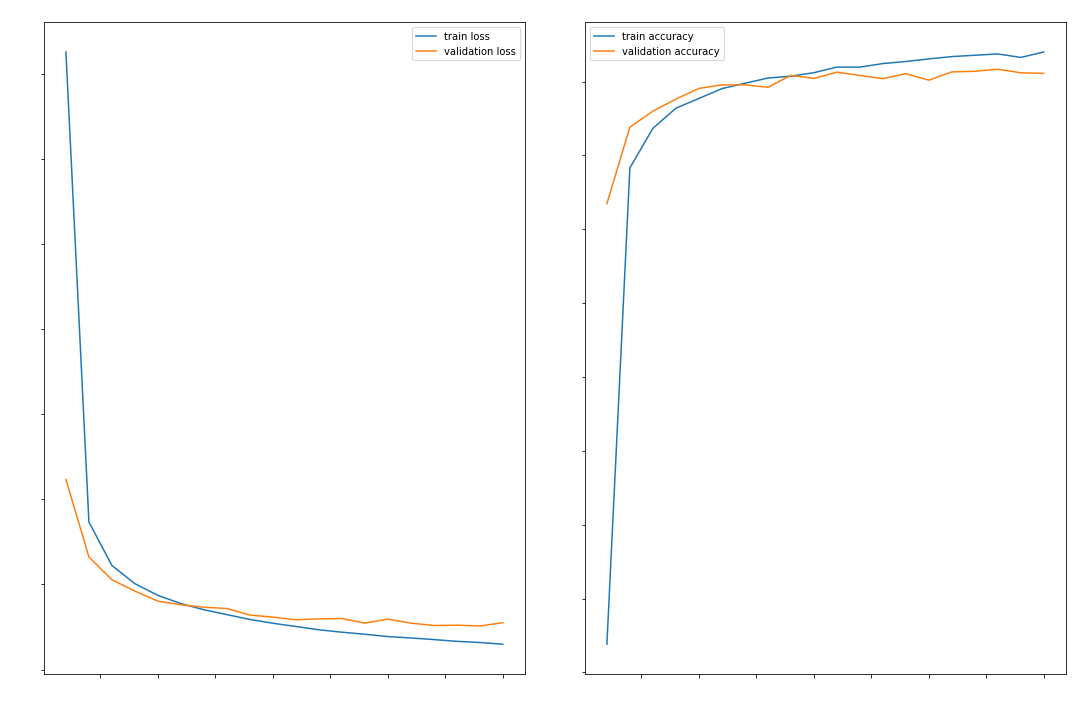

In [ ]:
plot_result(history)

In [ ]:
# 큰 모델
# hidden Layer: 4 - 256, 256, 128, 128
def create_model():
    model = keras.Sequential()
    # Input Layer
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    # Hidden Layer
    model.add(keras.layers.Dense(256, activation = 'relu'))
    model.add(keras.layers.Dense(256, activation = 'relu'))
    model.add(keras.layers.Dense(126, activation = 'relu'))
    model.add(keras.layers.Dense(126, activation = 'relu'))
    # Output Layer
    model.add(keras.layers.Dense(N_CLASS, activation = 'softmax'))
    
    # 컴파일
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
model = create_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 126)               32382     
_________________________________________________________________
dense_5 (Dense)              (None, 126)               16002     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1270      
Total params: 316,406
Trainable params: 316,406
Non-trainable params: 0
________________________________________________

In [ ]:
# 학습
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps)

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 0.4951 - accuracy: 0.8511 - val_loss: 0.1132 - val_accuracy: 0.9658
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0983 - accuracy: 0.9695 - val_loss: 0.0835 - val_accuracy: 0.9741
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0616 - accuracy: 0.9808 - val_loss: 0.0839 - val_accuracy: 0.9736
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0827 - val_accuracy: 0.9744
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0908 - val_accuracy: 0.9753
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0809 - val_accuracy: 0.9784
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0818 - val_accuracy: 0.9781
Epoch 

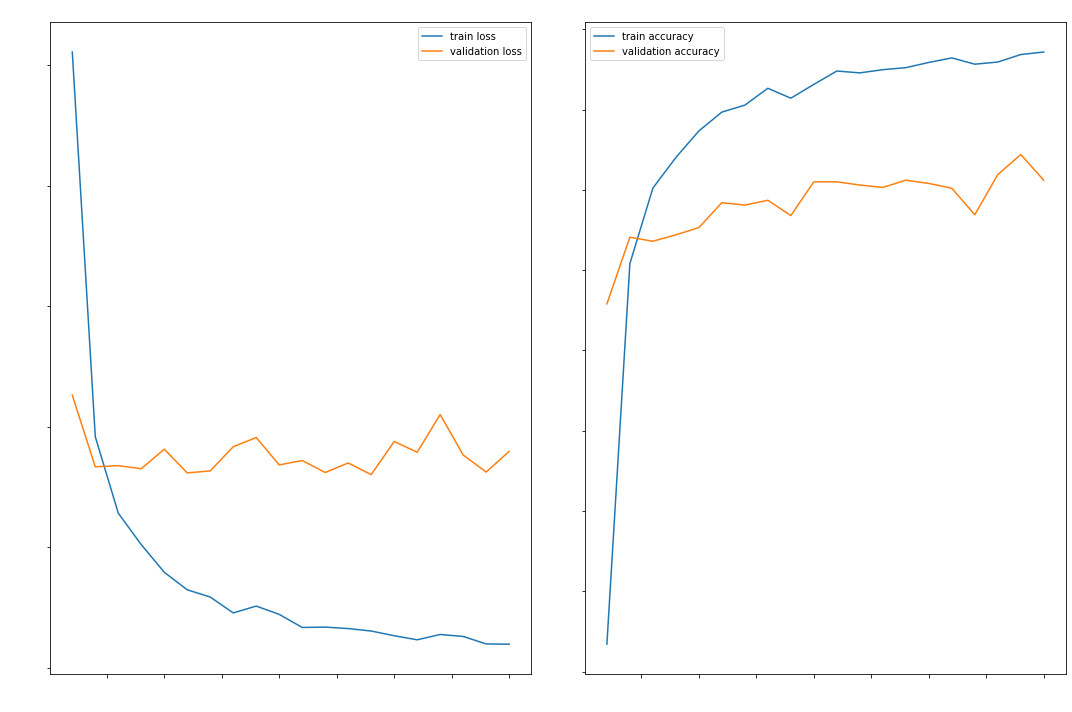

In [ ]:
plot_result(history)

# Dropout 적용

- dropout layer는 적용하려는 layer 앞에 추가
- dropout 비율은 0 ~ 1 사이 실수로 지정하는데, 보통 0.2 ~ 0.5 값을 지정
- dropout이 적용된 모델을 학습시킬때는 epoch 수를 더 늘려줌

In [ ]:
DROPOUT_RATE = 0.5

def create_dropout_model():
    model = keras.Sequential()
    # Input Layer
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())

    # Hidden Layer
    model.add(keras.layers.Dropout(rate = DROPOUT_RATE))
    model.add(keras.layers.Dense(256, activation = 'relu'))

    model.add(keras.layers.Dropout(rate = DROPOUT_RATE))
    model.add(keras.layers.Dense(256, activation = 'relu'))

    model.add(keras.layers.Dropout(rate = DROPOUT_RATE))
    model.add(keras.layers.Dense(126, activation = 'relu'))

    model.add(keras.layers.Dropout(rate = DROPOUT_RATE))
    model.add(keras.layers.Dense(126, activation = 'relu'))

    # Output Layer
    model.add(keras.layers.Dropout(rate = DROPOUT_RATE))
    model.add(keras.layers.Dense(N_CLASS, activation = 'softmax'))
    
    # 컴파일
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
# 자동완성: control + space
model = create_dropout_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 126)              

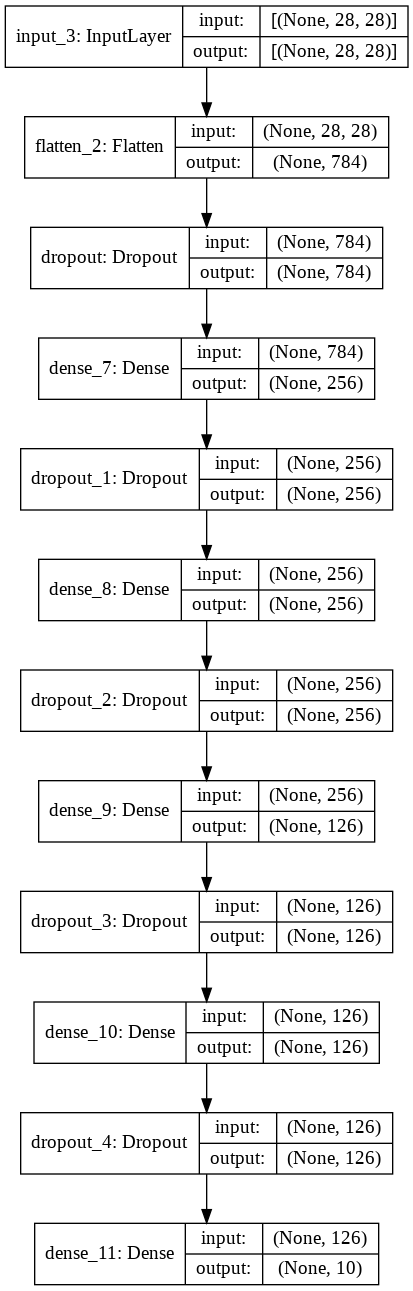

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps)

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 1.6824 - accuracy: 0.3935 - val_loss: 0.3186 - val_accuracy: 0.9214
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.6008 - accuracy: 0.8274 - val_loss: 0.2157 - val_accuracy: 0.9391
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.4648 - accuracy: 0.8718 - val_loss: 0.1789 - val_accuracy: 0.9495
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4029 - accuracy: 0.8921 - val_loss: 0.1593 - val_accuracy: 0.9554
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3659 - accuracy: 0.9027 - val_loss: 0.1549 - val_accuracy: 0.9555
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3565 - accuracy: 0.9061 - val_loss: 0.1443 - val_accuracy: 0.9597
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3308 - accuracy: 0.9117 - val_loss: 0.1295 - val_accuracy: 0.9648
Epoch 

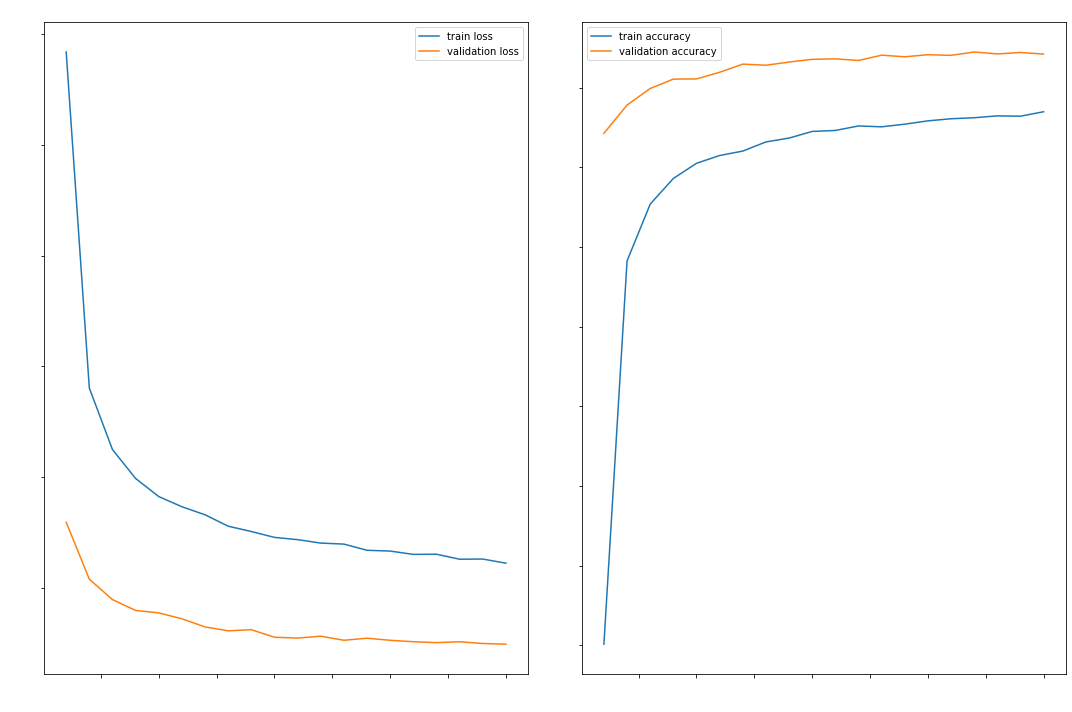

In [ ]:
# train보다 validation 결과가 잘나옴(Loss는 작게, 정확도는 높게 )
plot_result(history)

In [ ]:
# 평가
model.evaluate(val_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9711


[0.09837106615304947, 0.9710999727249146]

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
pred_dataset = X_test[:5]
pred_dataset.shape

(5, 28, 28)

In [ ]:
pred = model.predict(pred_dataset)
np.argmax(pred, axis = 1)

array([7, 2, 1, 0, 4])

In [ ]:
test_label[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# 학습률 조절

In [11]:
LEARNING_RATE = 0.001
N_EPOCHS = 30

def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation = 'relu'))
    model.add(keras.layers.Dense(128, activation = 'relu'))
    model.add(keras.layers.Dense(128, activation = 'relu'))
    model.add(keras.layers.Dense(N_CLASS, activation = 'softmax'))

    return model

## Exponential Decay 사용
- 일정한 step마다 일정한 비율로 학습률 변경(줄여줌)

In [10]:
 lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
     initial_learning_rate = LEARNING_RATE,  # 시작 학습률
     decay_steps = steps_per_epoch * 10,  # 몇 step마다 학습률 변경시킬 것인지. 10 에폭
     decay_rate = 0.5,  # 학습률의 변화율. 기존 학습률 * 지정한 값
     staircase = True  # True: 1번에 변경. False: 매 step마다 조금씩 변화
 )
 # optimizer의 학습률대신 lr_scheduler를 설정

In [12]:
 model = create_model()

In [13]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr_scheduler),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps)

Epoch 1/30
600/600 [==============================] - 5s 4ms/step - loss: 0.4823 - accuracy: 0.8623 - val_loss: 0.1156 - val_accuracy: 0.9646
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1001 - accuracy: 0.9696 - val_loss: 0.0997 - val_accuracy: 0.9677
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0785 - val_accuracy: 0.9738
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.0694 - val_accuracy: 0.9792
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0338 - accuracy: 0.9903 - val_loss: 0.0817 - val_accuracy: 0.9755
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0851 - val_accuracy: 0.9772
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0236 - accuracy: 0.9921 - val_loss: 0.0760 - val_accuracy: 0.9771
Epoch 

# Learning Rate 조정과 관련 callback 사용
- CallBack: 학습 도중, 특정 이벤트(변화) 발생하면 호출되는 기능

## ReduceLROnPlateau callback
- patience 에폭동안 monitor에 지정한 지표가 향상되지 않으면 현재 learning_rate에 factor(0 ~ 1 사이 실수) 곱해 learning rate 조정

In [16]:
model = create_model()
model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
# ReduceLROnPlateau callback 생성
rlp_callback = keras.callbacks.ReduceLROnPlateau(patience = 10,  # 10 에폭동안 기다려라
                                                 monitor = 'val_loss',  # validation loss의 지표가 향상되지 않으면
                                                 factor = 0.5,  # 현재 학습률에 0.5 곱한 값을 새 학습률로 조정,
                                                 verbose = 1)  # 학습률 바뀌면 로그를 출력

# Callback은 fit할 때 적용
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps,
                    callbacks = [rlp_callback])

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4786 - accuracy: 0.8621 - val_loss: 0.1138 - val_accuracy: 0.9636
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0999 - accuracy: 0.9697 - val_loss: 0.0962 - val_accuracy: 0.9690
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0630 - accuracy: 0.9801 - val_loss: 0.0728 - val_accuracy: 0.9779
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.0756 - val_accuracy: 0.9768
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0777 - val_accuracy: 0.9771
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0284 - accuracy: 0.9902 - val_loss: 0.0920 - val_accuracy: 0.9771
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0832 - val_accuracy: 0.9789
Epoch 

## LearningRateScheduler callback 사용
- 사용자 정의 학습률 조정함수를 만들어 적용
- 학습률 조정하는 함수 만들어 callback 생성시 등록
    -  매개변수
        - 1. Epoch
        - 2. 현시점 learning rate
    - 반환값
        - 조정한 learning rate


In [26]:
def user_lr(epoch, lr):
    if epoch < 5:
        return lr 
    elif epoch < 10:
        if epoch == 6:
            print("===========================Change Learning Rate: ", lr * 0.5, "Epochs: ", epoch)
        return lr * 0.5
    elif epoch < 20:
        if epoch == 11:
            print("===========================Change Learning Rate: ", lr * 0.5, "Epochs:", epoch)
        return lr * 0.5
    else:
        return lr

In [27]:
lr_scheduler_callback = keras.callbacks.LearningRateScheduler(user_lr)

model = create_model()
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps,
                    callbacks = [lr_scheduler_callback])

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4676 - accuracy: 0.8599 - val_loss: 0.1438 - val_accuracy: 0.9554
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.1006 - accuracy: 0.9689 - val_loss: 0.0887 - val_accuracy: 0.9723
Epoch 3/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.0846 - val_accuracy: 0.9742
Epoch 4/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0805 - val_accuracy: 0.9757
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0333 - accuracy: 0.9887 - val_loss: 0.0778 - val_accuracy: 0.9785
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0684 - val_accuracy: 0.9814
Epoch 7/30
===========================Change Learning Rate:  0.0002500000118743628 Epochs:  6
600/600 [==============================] - 3s 4ms/step